In [1]:
import pandas
from matplotlib import pyplot as plt
import re

In [2]:
df = pandas.read_csv('LoansDataset.csv')

In [19]:
df['customer_age'].value_counts()

customer_age
23    3890
22    3634
24    3549
25    3038
26    2477
      ... 
80       1
84       1
76       1
67       1
99       1
Name: count, Length: 62, dtype: int64

We can see that the younger folks borrow more loans than the older folks

In [7]:
unwanted_items = ['£', ',']
for i in unwanted_items:
    df['loan_amnt'] = df['loan_amnt'].str.replace(i, '')

In [9]:
df['loan_amnt'] = df['loan_amnt'].astype(float)

In [12]:
df.fillna(0, inplace=True)

Total Loan Amount

In [13]:
sum(df['loan_amnt'])

317907300.0

In [16]:
def df_age(age):
    filt_age = df['customer_age'] == age
    return df.loc[filt_age]

The function above filters the dataframe by age. 
Now let us get the total loan amount of each age group

In [20]:
def total_amount(age):
    return sum(df_age(age)['loan_amnt'])

In [34]:
ages = []
for i in df['customer_age']:
    if i not in ages:
        ages.append(i)

In [35]:
age_labels = []
for i in ages:
    age_labels.append('age_'+str(i))

In [37]:
total_amount_by_age = []
for age in ages:
    total_amount_by_age.append(total_amount(age))

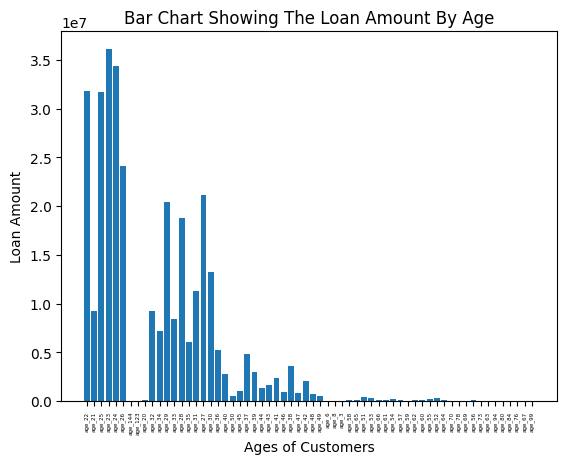

In [76]:
plt.bar(age_labels, total_amount_by_age)
plt.xticks(rotation=90, fontsize=4)
plt.xlabel('Ages of Customers')
plt.ylabel('Loan Amount')
plt.title('Bar chart showing the loan amount by age'.title())
plt.show()

We observe that the 23 year olds borrow more money than others. Lets fid out what they borrow for

In [79]:
df_age(23)['loan_intent'].value_counts()

loan_intent
EDUCATION            1155
VENTURE               745
PERSONAL              645
MEDICAL               634
DEBTCONSOLIDATION     626
HOMEIMPROVEMENT        85
Name: count, dtype: int64

In [99]:
df_age(18)['loan_intent'].value_counts()

Series([], Name: count, dtype: int64)